This coding was done with help from Karina : Data Scientist (youtube lectures, however the dataset was cut down, because of slow computer)
This dataset contains anonymized features
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
Amount: The transaction amount
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard_2023.csv to creditcard_2023.csv


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html,  lot of other options to check out and do better, especially to understand the leaf and nodes and the forest-kind of classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns # plotting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('creditcard_2023.csv') #file downloaded from kaggle.com, found this dataset from youtube, anonymized dataset
#About this file
#Each transaction is labeled as either fraudulent (1) or non-fraudulent (0), making it an ideal dataset for training and evaluating fraud detection systems.

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.info() #these are all pandas specific features, that help you work with  data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Checking for missing values using, isnull().sum()

In [ ]:
df.isnull().sum()
#incase of missing values instead of zero in would give you the number of missing values in the dataset. In case such a gap exists, it can be filled in by
#the mean of the distribution, df.fillna(df.mean(),inplace = True) impute with the average values

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Why applying it to another dataset called the application, I learnt that if the  DataFrame contains non-numeric (categorical) columns (like 'Cash loans', 'Working', etc.), then this strategy won't work

Dividing the datasets into class and features
Selecting target variables

In [ ]:
X = df.drop(['id', 'Class'], axis=1, errors = 'ignore') #column id and column class , axis = 1 implies we are looking at the columns and not the rows, class is related to
#the target variable
y = df['Class']

In [ ]:
print(X.columns.tolist()) #list of all the columns in the dataset being used as features

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting dataset into training and test datasets as usual, seed selected to be able to reproduce the dataset

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454904, 29), (113726, 29), (454904,), (113726,))

Scaling the features to make sure all the features contribute equally and they are at the same scale

```
# This is formatted as code
```



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#SVM, k-NN are sensitive to feature values and thus they alwsys need to be scaled

In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))
#does not really correspond to a real world set as the number of fraud and real transaction is almost the same, which would not be the situation in real-life and it would
#be a highly imbalanced dataset

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64
Class
1    0.500994
0    0.499006
Name: proportion, dtype: float64


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50 , max_depth = 10, min_samples_split=5, random_state=42) #estimators = no of trees in the forest, max depth= limits the depth of each tree to prevent overfitting, min split = no of nodes required for split
#multipe decison tree based machine learning model

In [ ]:
# cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = 'f1') #cross-validation, splitting, repeats for each fold both training and test,
# #F1 score balaces precision and recall
# print("\nCross-Validation F1 scores: ", cv_scores)
# print("Average F1 score:", np.mean(cv_scores))
#This run was taking way too much time and I was unable to run this on my laptop

In [ ]:
X_sample = X_train_scaled[:10000]
y_sample = y_train[:10000]

cv_scores = cross_val_score(rf_model, X_sample, y_sample, cv=5, scoring='f1')
print("\nCross-Validation F1 scores: ", cv_scores)
print("Average F1 score:", np.mean(cv_scores))


Cross-Validation F1 scores:  [0.9762151  0.97035881 0.97020387 0.97401247 0.97626419]
Average F1 score: 0.9734108889526496


In [ ]:
rf_model.fit(X_sample, y_sample)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))
#1 is the fraudulent cases, f1 score is lower than in the video but that is expected because we could not work with larger amount of data

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     56750
           1       1.00      0.96      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



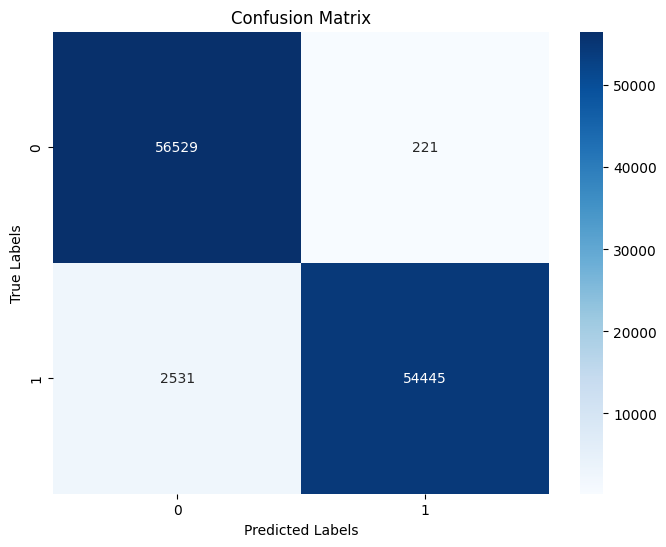

In [ ]:
plt.figure(figsize =(8,6))
cm = confusion_matrix(y_test, y_pred) #how often predicted labels match the true labels
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues') #format annotation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#true positives are also less than that in the video (56,678), which is also expected given we have cut down the training data

In [ ]:
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)
#imports the importance of each feature, what is the importance of each feature and it is different in this case from the video, determined by the random forest model.

In [ ]:
feature_imp.head()

,Feature,Importance
13,V14,0.215307
9,V10,0.155003
11,V12,0.093166
16,V17,0.089625
10,V11,0.087874


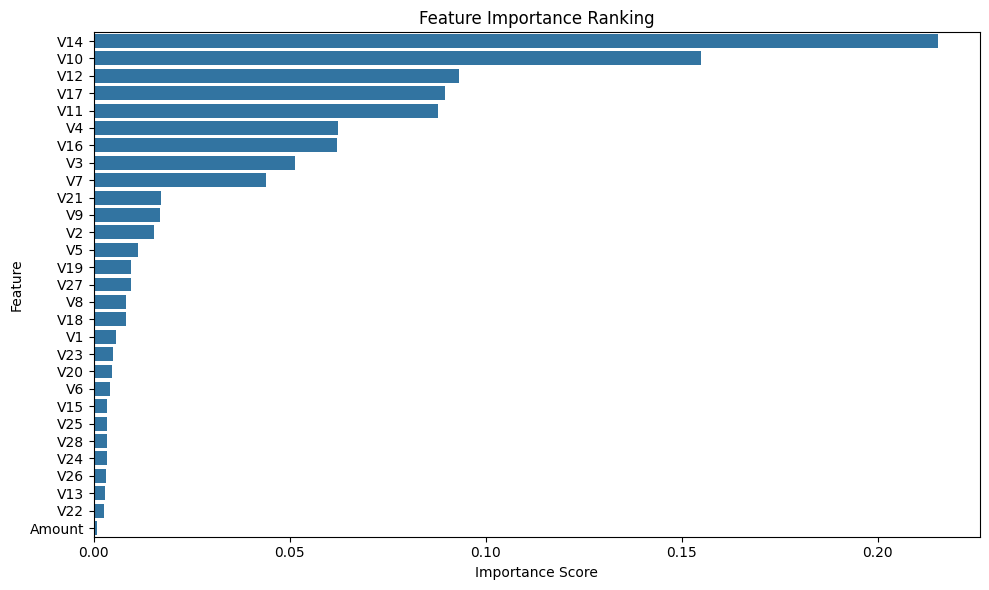

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = feature_imp, x='Importance', y='Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

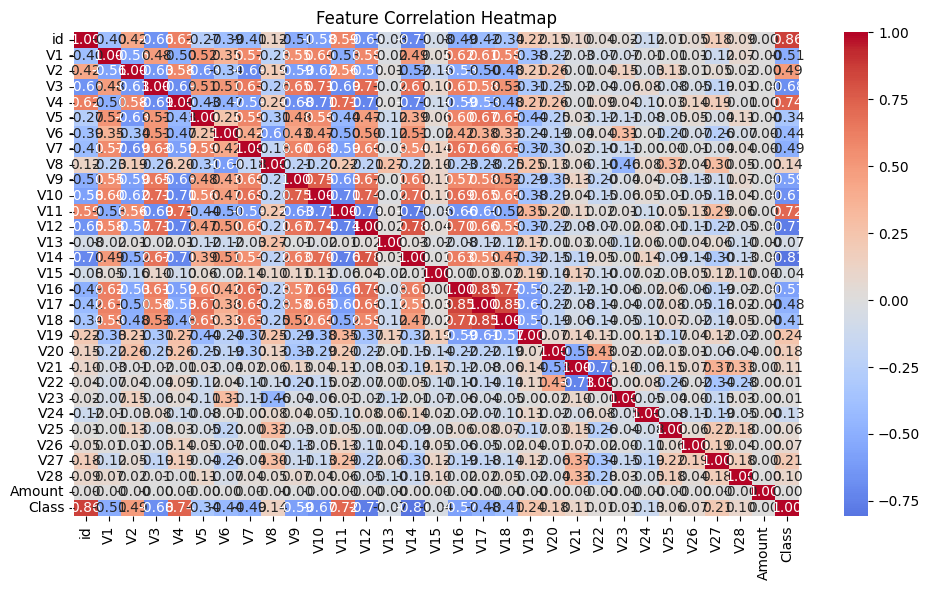

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr() #full data
sns.heatmap(correlation_matrix, cmap='coolwarm', center = 0, annot = True, fmt = '.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

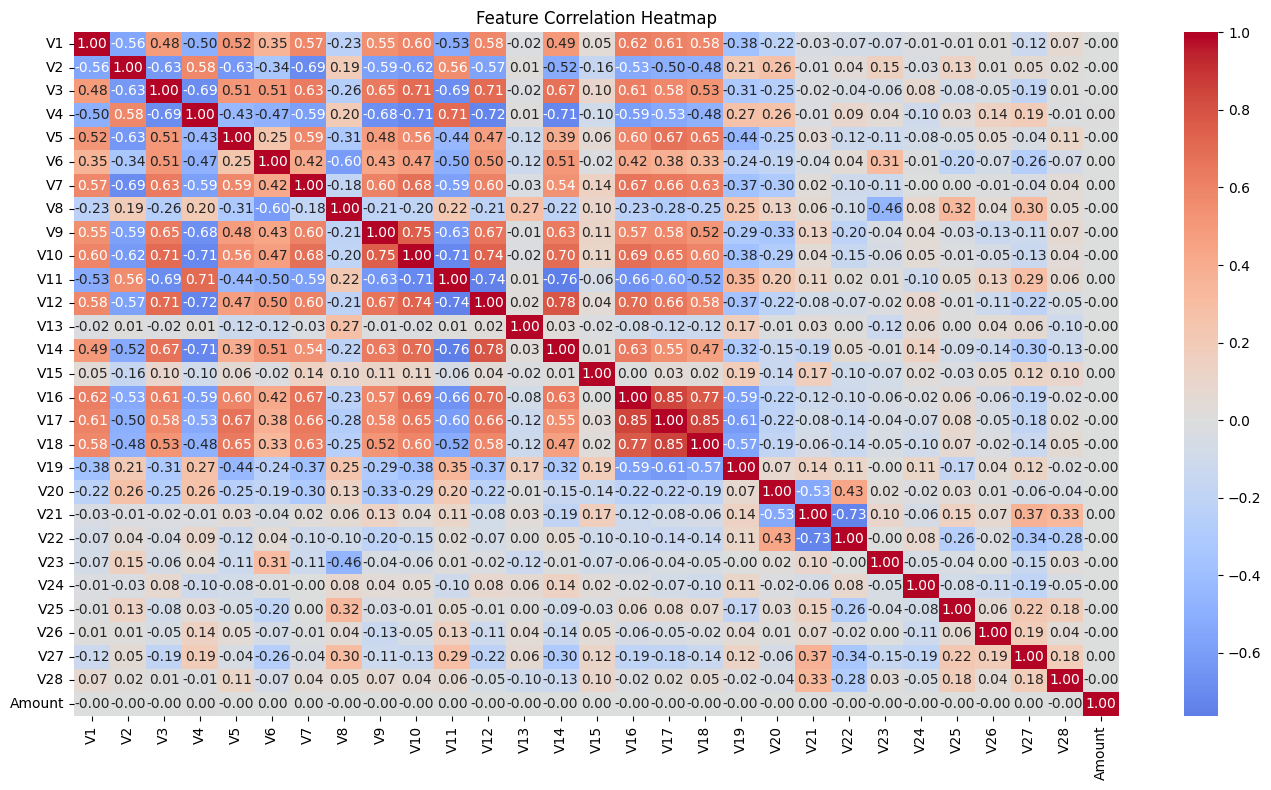

In [ ]:
plt.figure(figsize=(14, 8))
correlation_matrix = X.corr() #X part of the data
sns.heatmap(correlation_matrix, cmap='coolwarm', center = 0, annot = True, fmt = '.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

#multi-colinearity = high correlation between our features, correlation always in the range of -1 to 1, 0 being no correlation,
#-1 being strong negative correlation, +1 is strong positive correlation

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #what is the roc curve?, have not used this before
#requires predicted probability
roc_auc = auc(fpr, tpr)  #, auc = area under the curve, perfect model has the auc = 1, random classifier has auc of 0.5
#false positive rate, incorrectly predicted, labels, these seem to be really important in this kind of classification particularly for credit card fraud
#tpr : true positive rate : precision

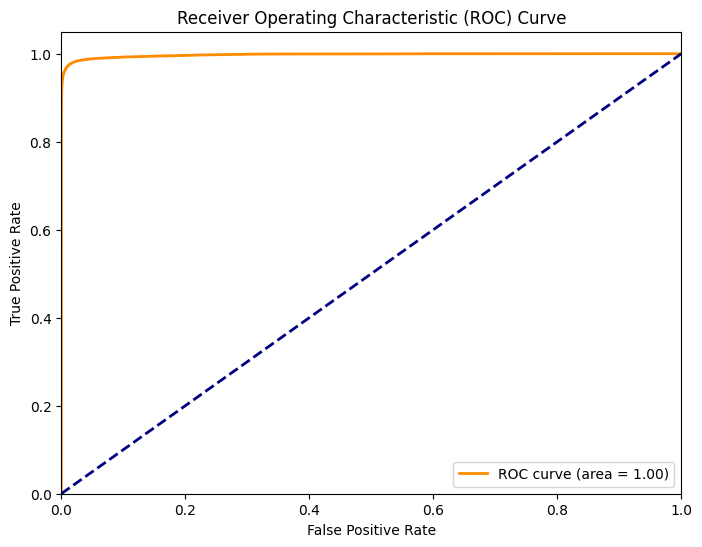

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


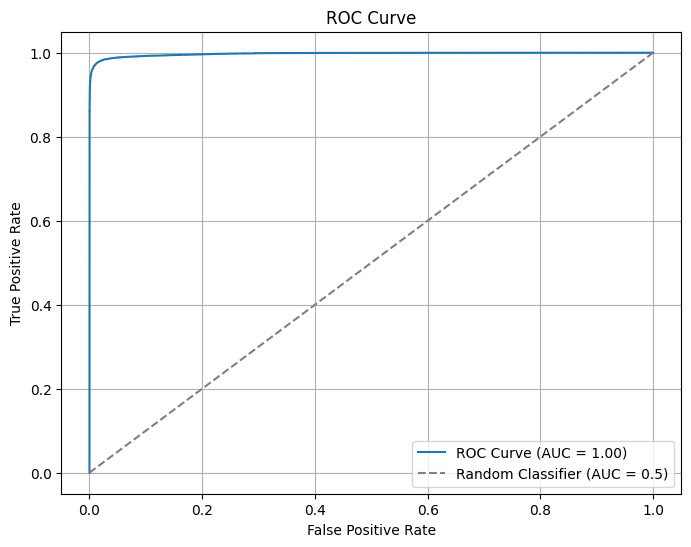

In [ ]:
# 1. Get predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Compute AUC
roc_auc = auc(fpr, tpr)

# 4. Plot it
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

True Positive Rate (TPR) = Sensitivity = Recall =
TP / (TP + FN)

Of all actual positives, how many did the model correctly predict?

False Positive Rate (FPR) =
FP / (FP + TN)

Of all actual negatives, how many were incorrectly predicted as positive?

The higher the curve rises above the diagonal, the better your model is. A random classifier follows the diagonal line → AUC = 0.5. A perfect model hugs the top-left corner → AUC = 1.0.